In [71]:
import pandas as pd

def pandas_groupby(data, groupby_key):
    start=time()
    temp=[row for i,row in data.groupby(by=groupby_key)]
    return time()-start, temp

In [72]:
import itertools as it
from operator import itemgetter

def iter_groupby(data, args):
    start=time()
    array=data.values
    key_func=itemgetter(*args)
    array = sorted(array, key=key_func)
    temp = [list(g) for k, g in it.groupby(array, key=key_func)]
    return time()-start, temp

In [73]:
import numpy as np
from time import time


In [74]:
dfs={}
for key_num in range(1,4):
    pa_time=[]
    li_time=[]
    kumiawase=[]
    groupby_num=[]
    for i in range(1,6):
        row_num=10**i
        for j in range(1,6):
            generate_range=10**j
            data = pd.DataFrame(np.random.randint( 1, generate_range, (row_num, key_num)))
            times, ret=pandas_groupby(data,[ii for ii in range(key_num)])
            pa_time.append(times)

            times, ret2=iter_groupby(data, [ii for ii in range(key_num)])
            li_time.append(times)
            groupby_num.append(len(ret))
            kumiawase.append((row_num, generate_range))
    df=pd.DataFrame([pa_time,li_time,kumiawase, groupby_num]).T
    df=df.rename(columns={0:"pandas", 1:"iter", 2:"kumi",3:"groupby_num"})
    dfs[key_num]=df

In [75]:
def parse(data):
    return pd.Series([data[0], data[1]])

In [76]:
for key_num in range(1,4):
    dfs[key_num][["1","2"]] = dfs[key_num]["kumi"].apply(parse)

In [77]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

c:\users\akasaka\appdata\local\programs\python\python36\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


行数:10
groupbyキーの取りうる値のユニーク数:10
行数:100
groupbyキーの取りうる値のユニーク数:10
行数:1000
groupbyキーの取りうる値のユニーク数:10
行数:10000
groupbyキーの取りうる値のユニーク数:10
行数:100000
groupbyキーの取りうる値のユニーク数:10


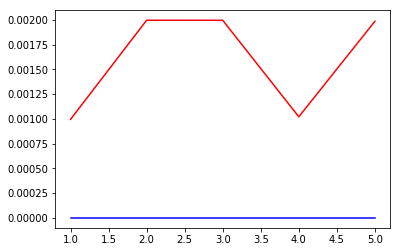

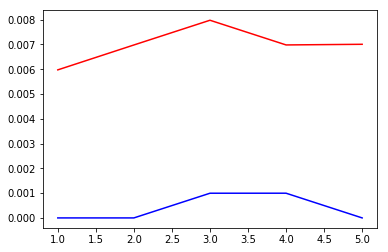

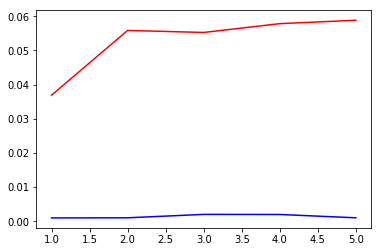

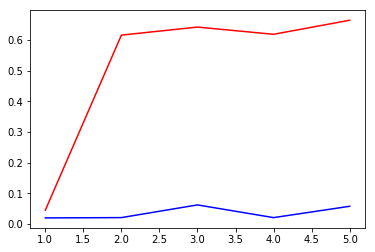

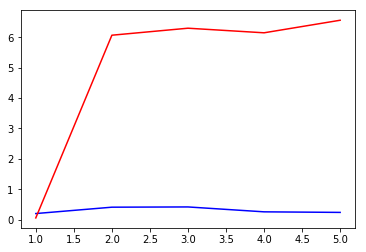

In [84]:
import math


t,temp = iter_groupby(dfs[3],[4])
for row in temp:
    fig = plt.figure()
    ax = fig.add_subplot(111)
    t = pd.DataFrame(row)
    ax.plot([int(math.log10(la)) for la in t[5]], t[1], label="iter", color="blue")
    ax.plot([int(math.log10(la)) for la in t[5]], t[0], label="pandas",color="red")
    fig.show()
    print("行数:"+str(t[4][0]))
    print("groupbyキーの取りうる値のユニーク数:"+str(t[5][0]))
